# Prediction using Bagging with Random Forest

# Challenge 

In [1]:
# general imports
import pandas as pd         
import numpy as np          
import matplotlib.pyplot as plt  
import seaborn as sb 
from numpy import mean
from numpy import std

# data preprocessing imports
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Model Building imports
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation import
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,precision_score,recall_score,roc_curve,roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Data Loading

In [2]:
#Importing dataset

df=pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C5_S6_AllRent_Data_Challenge.csv')
df.head()

,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,105408,1.0,0,0f9d07991ba14c82d3d368b72d90270a,04-04-2016 03:34,Gorgeous unit in one of the most genuinely cov...,230 Central Park South,"['Cats Allowed', 'Dogs Allowed', 'Doorman', 'E...",40.7672,6827153,-73.9802,932589de9230b697808216774fa26bd4,['https://photos.renthop.com/2/6821519_0a14cc2...,2800,230 Central Park South,high
1,110219,1.0,1,564d6f608f41e8d4a5e181c4e068e3d9,21-04-2016 20:40,Enormous 1 bedroom apartment in Murray Hill. F...,E 39th St,"['Cats Allowed', 'Dogs Allowed', 'Reduced Fee'...",40.7483,6908998,-73.9741,489ad933197469ae66acd1f7ce18f908,['https://photos.renthop.com/2/6908998_6b00895...,2100,243 E 39th St,high
2,56113,1.0,1,69790fbf0bf7e22b1d0ebc721cf0f633,14-05-2016 05:44,"This 1 bedroom, 1 bathroom spacious apartment ...",E 25th St.,"['Elevator', 'Furnished', 'Hardwood Floors']",40.7399,7013774,-73.9812,792c0f1ad1431397c65db3e69b770928,['https://photos.renthop.com/2/7013774_e7ead5d...,3000,217 E 25th St.,high
3,37765,1.0,2,d0234abbc01a982d54e8d446acc03405,05-06-2016 03:37,SPECTACULAR2 BEDROOM APARTMENT IN LUXURY 24HR ...,West 34th Street,"['Doorman', 'Elevator', 'Dishwasher', 'Hardwoo...",40.7530,7113518,-73.9958,eb5a6c4c2eb6f3e2a085c477afd5a815,['https://photos.renthop.com/2/7113518_d234153...,3000,360 West 34th Street,high
4,67397,1.0,2,a36895b9975c6991ca0fa1d9a99023a1,26-05-2016 05:36,NO FEE.. Newly Reno XL Convertible 2 Br .. Pri...,East 72nd Street,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7695,7071666,-73.9603,0a6ba20b892ed61df751420934d1ab51,['https://photos.renthop.com/2/7071666_4f81618...,3300,200 East 72nd Street,high


# Data Exploration

In [3]:
# shape of the dataset
print('The number of samples in data is {}.'.format(df.shape[0]))
print('The number of columns in data is {}.'.format(df.shape[1]))

The number of samples in data is 9871.
The number of columns in data is 16.


In [4]:
# exploring the existing data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9871 non-null   int64  
 1   bathrooms        9871 non-null   float64
 2   bedrooms         9871 non-null   int64  
 3   building_id      9871 non-null   object 
 4   created          9871 non-null   object 
 5   description      9585 non-null   object 
 6   display_address  9837 non-null   object 
 7   features         9871 non-null   object 
 8   latitude         9871 non-null   float64
 9   listing_id       9871 non-null   int64  
 10  longitude        9871 non-null   float64
 11  manager_id       9871 non-null   object 
 12  photos           9871 non-null   object 
 13  price            9871 non-null   int64  
 14  street_address   9866 non-null   object 
 15  interest_level   9871 non-null   object 
dtypes: float64(3), int64(4), object(9)
memory usage: 1.2+ MB


In [5]:
# exploring the numeric data types
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9871.0,6.182897e+04,35901.607107,9.000000e+00,3.096800e+04,6.135400e+04,9.322950e+04,1.239950e+05
bathrooms,9871.0,1.210617e+00,0.501985,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
bedrooms,9871.0,1.533685e+00,1.106696,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,8.000000e+00
latitude,9871.0,4.074717e+01,0.414548,0.000000e+00,4.072750e+01,4.075060e+01,4.077390e+01,4.303460e+01
listing_id,9871.0,7.024062e+06,126910.766917,6.812005e+06,6.914494e+06,7.022816e+06,7.130978e+06,7.742631e+06
longitude,9871.0,-7.396555e+01,0.760686,-8.761340e+01,-7.399220e+01,-7.397830e+01,-7.395510e+01,0.000000e+00
price,9871.0,3.662861e+03,2559.911997,4.300000e+01,2.499000e+03,3.125000e+03,4.047500e+03,9.000000e+04


In [6]:
# exploring the existing data types
df.dtypes

Unnamed: 0           int64
bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
interest_level      object
dtype: object

In [7]:
# checking missing values in data
df.isnull().sum()

Unnamed: 0           0
bathrooms            0
bedrooms             0
building_id          0
created              0
description        286
display_address     34
features             0
latitude             0
listing_id           0
longitude            0
manager_id           0
photos               0
price                0
street_address       5
interest_level       0
dtype: int64

<AxesSubplot:>

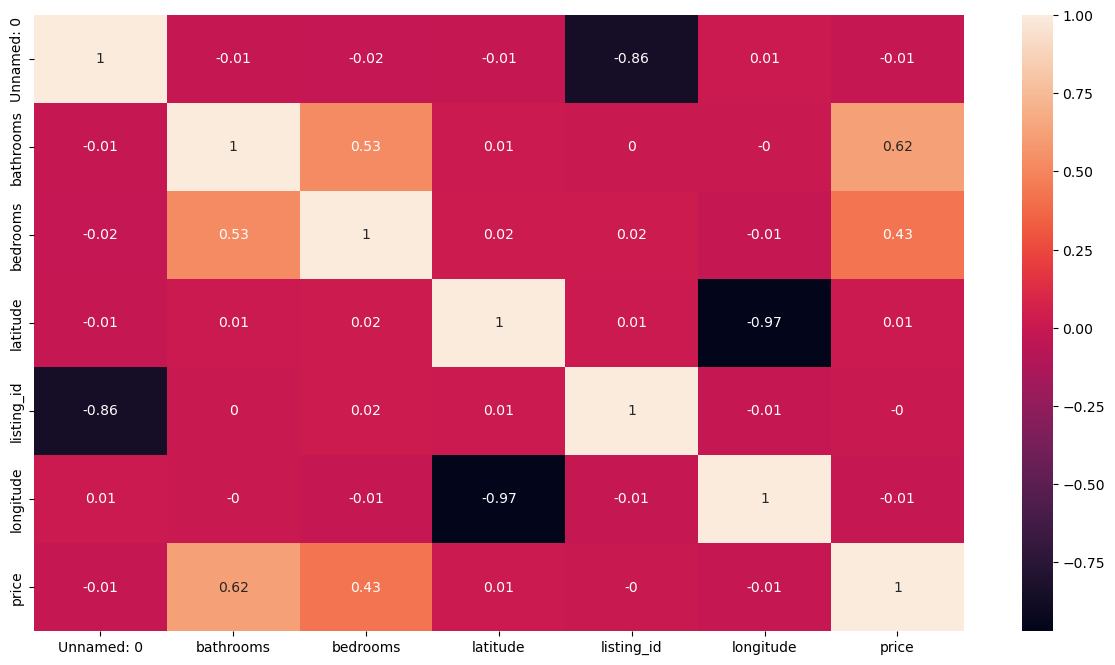

In [8]:
# Checking correlations among the data
plt.figure(figsize=(15,8))
sb.heatmap(round(df.corr(),2),annot=True)

# Data Visualization

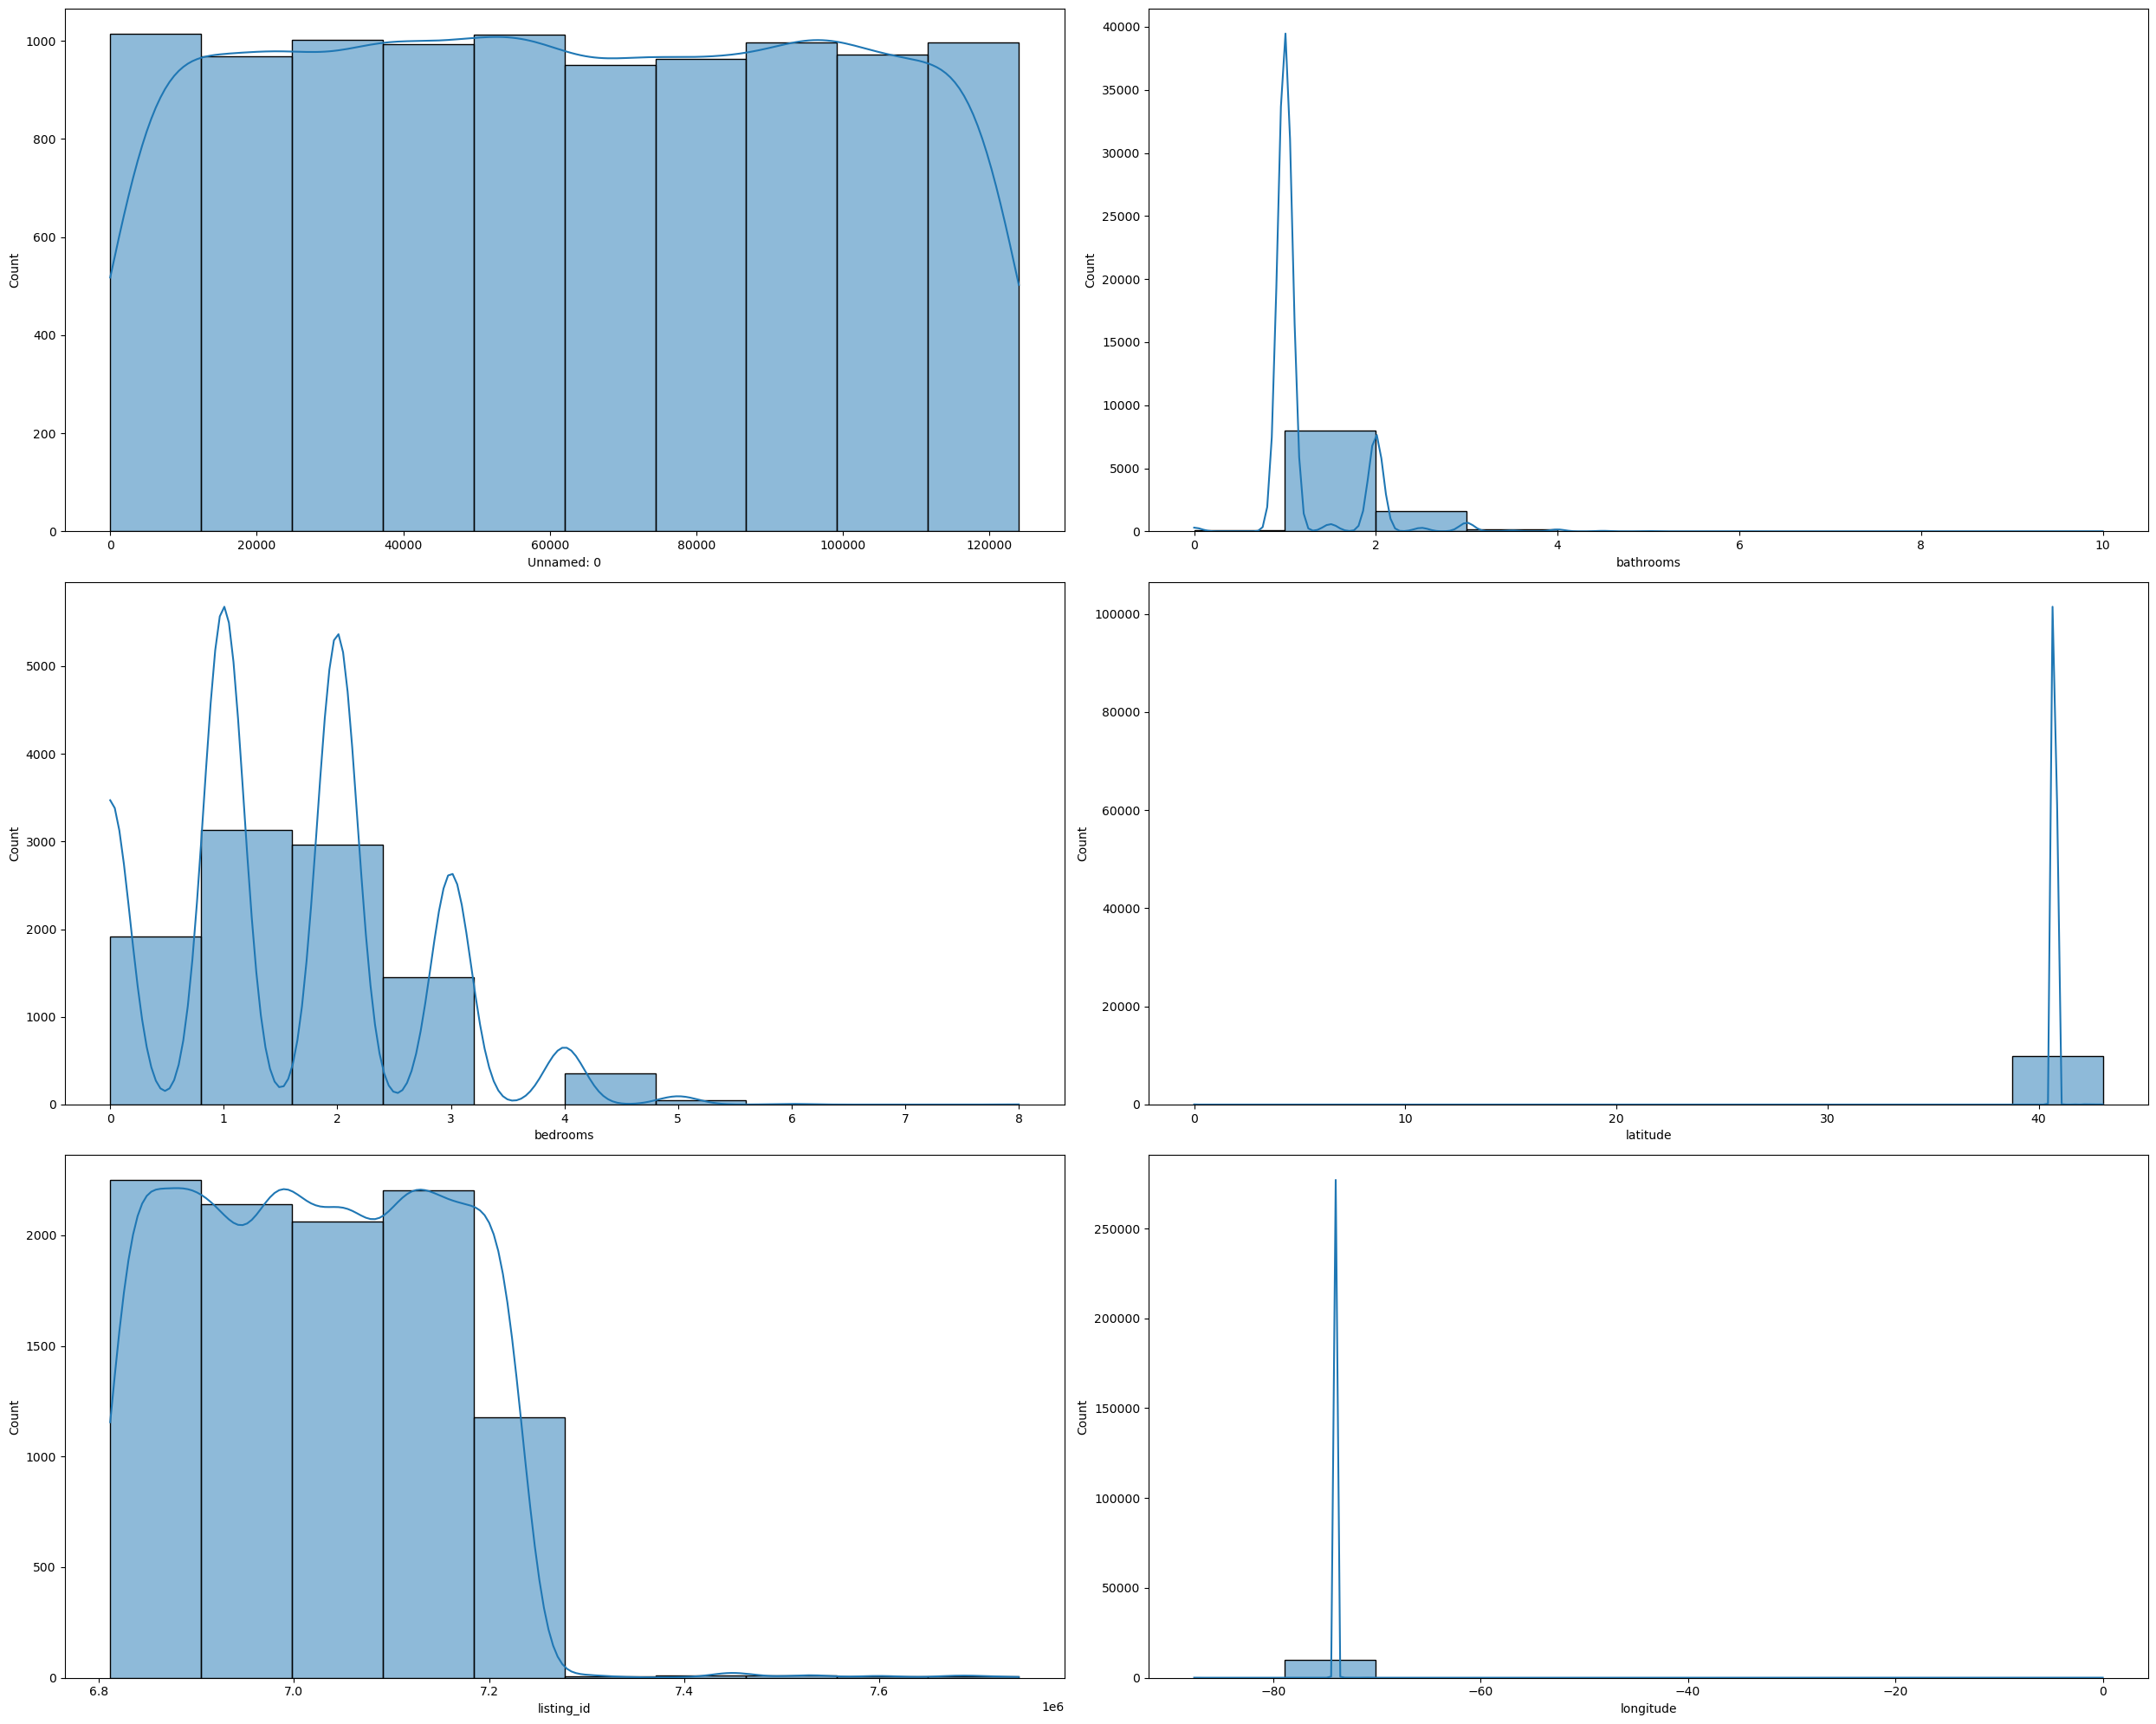

In [9]:
numerics=['int16','int32','int64','float16','float32','float64']
new_df=df.select_dtypes(include=numerics)
numerics_col=new_df.columns
n_col=2
n_bins=25
n_row=int((len(numerics_col)/n_col))
fig,axs=plt.subplots(n_row,n_col,tight_layout=True,figsize=(25,20))
for col,ax in zip(numerics_col,axs.flatten()[:len(numerics_col)]):
    sb.histplot(data=new_df[col],kde=True, ax=ax, bins=10)
plt.show()

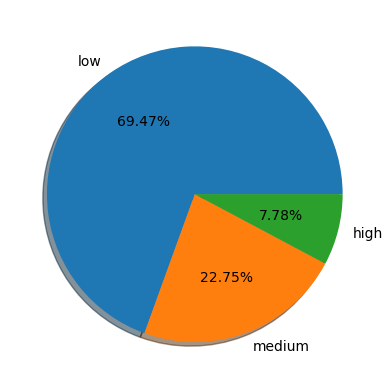

In [10]:
d_ind=df['interest_level'].value_counts().index
d_value=df['interest_level'].value_counts().values
plt.pie(x=d_value,labels=d_ind,autopct='%.2f%%',shadow=True)
plt.show()

# Data Preprocessing

In [11]:
#Deleting Unnamed Column
df.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

In [12]:
Categorical=df.select_dtypes(include='object').columns

end=LabelEncoder()
for i in Categorical:
    df[i]=end.fit_transform(df[i])

In [13]:
df.dtypes

bathrooms          float64
bedrooms             int64
building_id          int32
created              int32
description          int32
display_address      int32
features             int32
latitude           float64
listing_id           int64
longitude          float64
manager_id           int32
photos               int32
price                int64
street_address       int32
interest_level       int32
dtype: object

In [14]:
df.dropna(inplace=True)

In [15]:
#Creating test and training datasets

X=df[['bathrooms','bedrooms','created','description','display_address','features','street_address']]
Y=df['interest_level']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=47)

print('Size of training dataset: ', X_train.shape)
print('Size of test dataset: ', X_test.shape)

Size of training dataset:  (6909, 7)
Size of test dataset:  (2962, 7)


In [16]:
# Feature Scaling

Sc=StandardScaler()
X_train=Sc.fit_transform(X_train)
X_test=Sc.fit_transform(X_test)

# Model Building : Decision Tree

In [17]:
DT=DecisionTreeClassifier()
DT.fit(X_train,Y_train)
Y_pred=DT.predict(X_test)
print('Decision Tree Accuracy Score : ',accuracy_score(Y_pred,Y_test))

Decision Tree Accuracy Score :  0.5638082376772451


# Model Building : Logistic Regression

In [18]:
 # Logistic Regression - training the model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
# Using the trained model to predict the outcome of the X_Test dataset
Y_pred = logreg.predict(X_test)
#Calculating the accuracy of the training dataset
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

68.88

In [19]:
# Indicates the value of the slope of each parameter 
logreg.coef_[0]
coef_df=pd.DataFrame(columns=['Feature','Slope'])
coef_df['Feature']=X.columns
coef_df['Slope']=logreg.coef_[0]
coef_df.sort_values(by='Slope',ascending=False)

,Feature,Slope
1,bedrooms,0.107394
6,street_address,0.038130
3,description,0.004163
5,features,-0.033000
2,created,-0.130443
4,display_address,-0.163613
0,bathrooms,-0.192840


In [20]:
#model.intercept_ indicates the intercept with the Y-axis
logreg.intercept_

array([-1.14992725,  1.12490036,  0.02502689])

In [21]:
# evalate the model on the test data
logreg.score(X_test, Y_test)

0.7069547602970966

In [22]:
# Model Evaluation
print(confusion_matrix(Y_test,Y_pred))
#tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
#print(tn, fp, fn, tp)

print('accuracy:', accuracy_score(Y_test, Y_pred))
print('recall:', recall_score(Y_test, Y_pred,average='weighted'))
print('f1-score:', f1_score(Y_test, Y_pred,average='weighted'))
print('precision:', precision_score(Y_test, Y_pred,average='weighted'))

print(classification_report(Y_test,Y_pred))

[[   0  234    0]
 [   0 2094    0]
 [   0  634    0]]
accuracy: 0.7069547602970966
recall: 0.7069547602970966
f1-score: 0.5855867357840666
precision: 0.49978503310672523
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.71      1.00      0.83      2094
           2       0.00      0.00      0.00       634

    accuracy                           0.71      2962
   macro avg       0.24      0.33      0.28      2962
weighted avg       0.50      0.71      0.59      2962



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classifi

# Model Building : Naive-Bayes

In [23]:
 # Naive-Bayes - training the model
nb = GaussianNB()
nb.fit(X_train, Y_train)
# Using the trained model to predict the outcome of the X_Test dataset
Y_pred = nb.predict(X_test)
#Calculating the accuracy of the training dataset
acc_nb = round(nb.score(X_train, Y_train) * 100, 2)
acc_nb

68.95

In [24]:
# Model Evaluation
print(confusion_matrix(Y_test,Y_pred))
#tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
#print(tn, fp, fn, tp)

print('accuracy:', accuracy_score(Y_test, Y_pred))
print('recall:', recall_score(Y_test, Y_pred,average='weighted'))
print('f1-score:', f1_score(Y_test, Y_pred,average='weighted'))
print('precision:', precision_score(Y_test, Y_pred,average='weighted'))

print(classification_report(Y_test,Y_pred))

[[   0  234    0]
 [   0 2094    0]
 [   0  630    4]]
accuracy: 0.7083051991897367
recall: 0.7083051991897367
f1-score: 0.5887343276213985
precision: 0.7145054394199413
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.71      1.00      0.83      2094
           2       1.00      0.01      0.01       634

    accuracy                           0.71      2962
   macro avg       0.57      0.34      0.28      2962
weighted avg       0.71      0.71      0.59      2962



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classifi

# Model Building : Decision Tree Classifier

In [25]:
 # Decision Tree - training the model
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
# Using the trained model to predict the outcome of the X_Test dataset
Y_pred = DT.predict(X_test)
#Calculating the accuracy of the training dataset
acc_DT = round(DT.score(X_train, Y_train) * 100, 2)
acc_DT

99.99

In [26]:
# Model Evaluation
print(confusion_matrix(Y_test,Y_pred))
#tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
#print(tn, fp, fn, tp)

print('accuracy:', accuracy_score(Y_test, Y_pred))
print('recall:', recall_score(Y_test, Y_pred,average='weighted'))
print('f1-score:', f1_score(Y_test, Y_pred,average='weighted'))
print('precision:', precision_score(Y_test, Y_pred,average='weighted'))

print(classification_report(Y_test,Y_pred))

[[  33  121   80]
 [ 160 1450  484]
 [  85  368  181]]
accuracy: 0.5617825793382849
recall: 0.5617825793382849
f1-score: 0.5747206466957377
precision: 0.5900470817706088
              precision    recall  f1-score   support

           0       0.12      0.14      0.13       234
           1       0.75      0.69      0.72      2094
           2       0.24      0.29      0.26       634

    accuracy                           0.56      2962
   macro avg       0.37      0.37      0.37      2962
weighted avg       0.59      0.56      0.57      2962



# Baseline Decision Tree Classifier

In [27]:
# define the model
model = DecisionTreeClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy using DT: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy using DT: 0.587 (0.015)


# Random Forest Bagging

In [30]:
# define the model
rf=RandomForestClassifier()
# evaluate the model
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=42)
score=cross_val_score(rf,X,Y,scoring='accuracy',cv=cv,n_jobs=-1)
# report performance
print('Mean Scoring Using RF : ',score.mean())

Mean Scoring Using RF :  0.6873334112695815


#### For this dataset, we can see that the Ensemble method Bagging with default hyperparameters achieves a higher classification F1-Score than a simple Decision Tree Classifier.